In [1]:
import sqlite3
import os
import pandas as pd
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
%matplotlib inline

In [3]:
inat_con = sqlite3.connect("indexd-insects-inaturalist-open-data-20220127.sq3db")
print(inat_con.total_changes)

0


In [ ]:
start_time = time.time()
count_df = pd.read_sql_query(
    """
    SELECT COUNT(photo_url_large) as photo_count, taxon_name 
    FROM insects 
    GROUP BY taxon_name
    ORDER BY COUNT(photo_url_large) DESC
    """,
    inat_con
)

print(count_df.head())
print("Executed in %.2f seconds" % (time.time() - start_time))

In [ ]:
print(count_df['photo_count'].mean())
print(count_df['photo_count'].max())
print(count_df['photo_count'].min())
print(count_df['photo_count'].median())

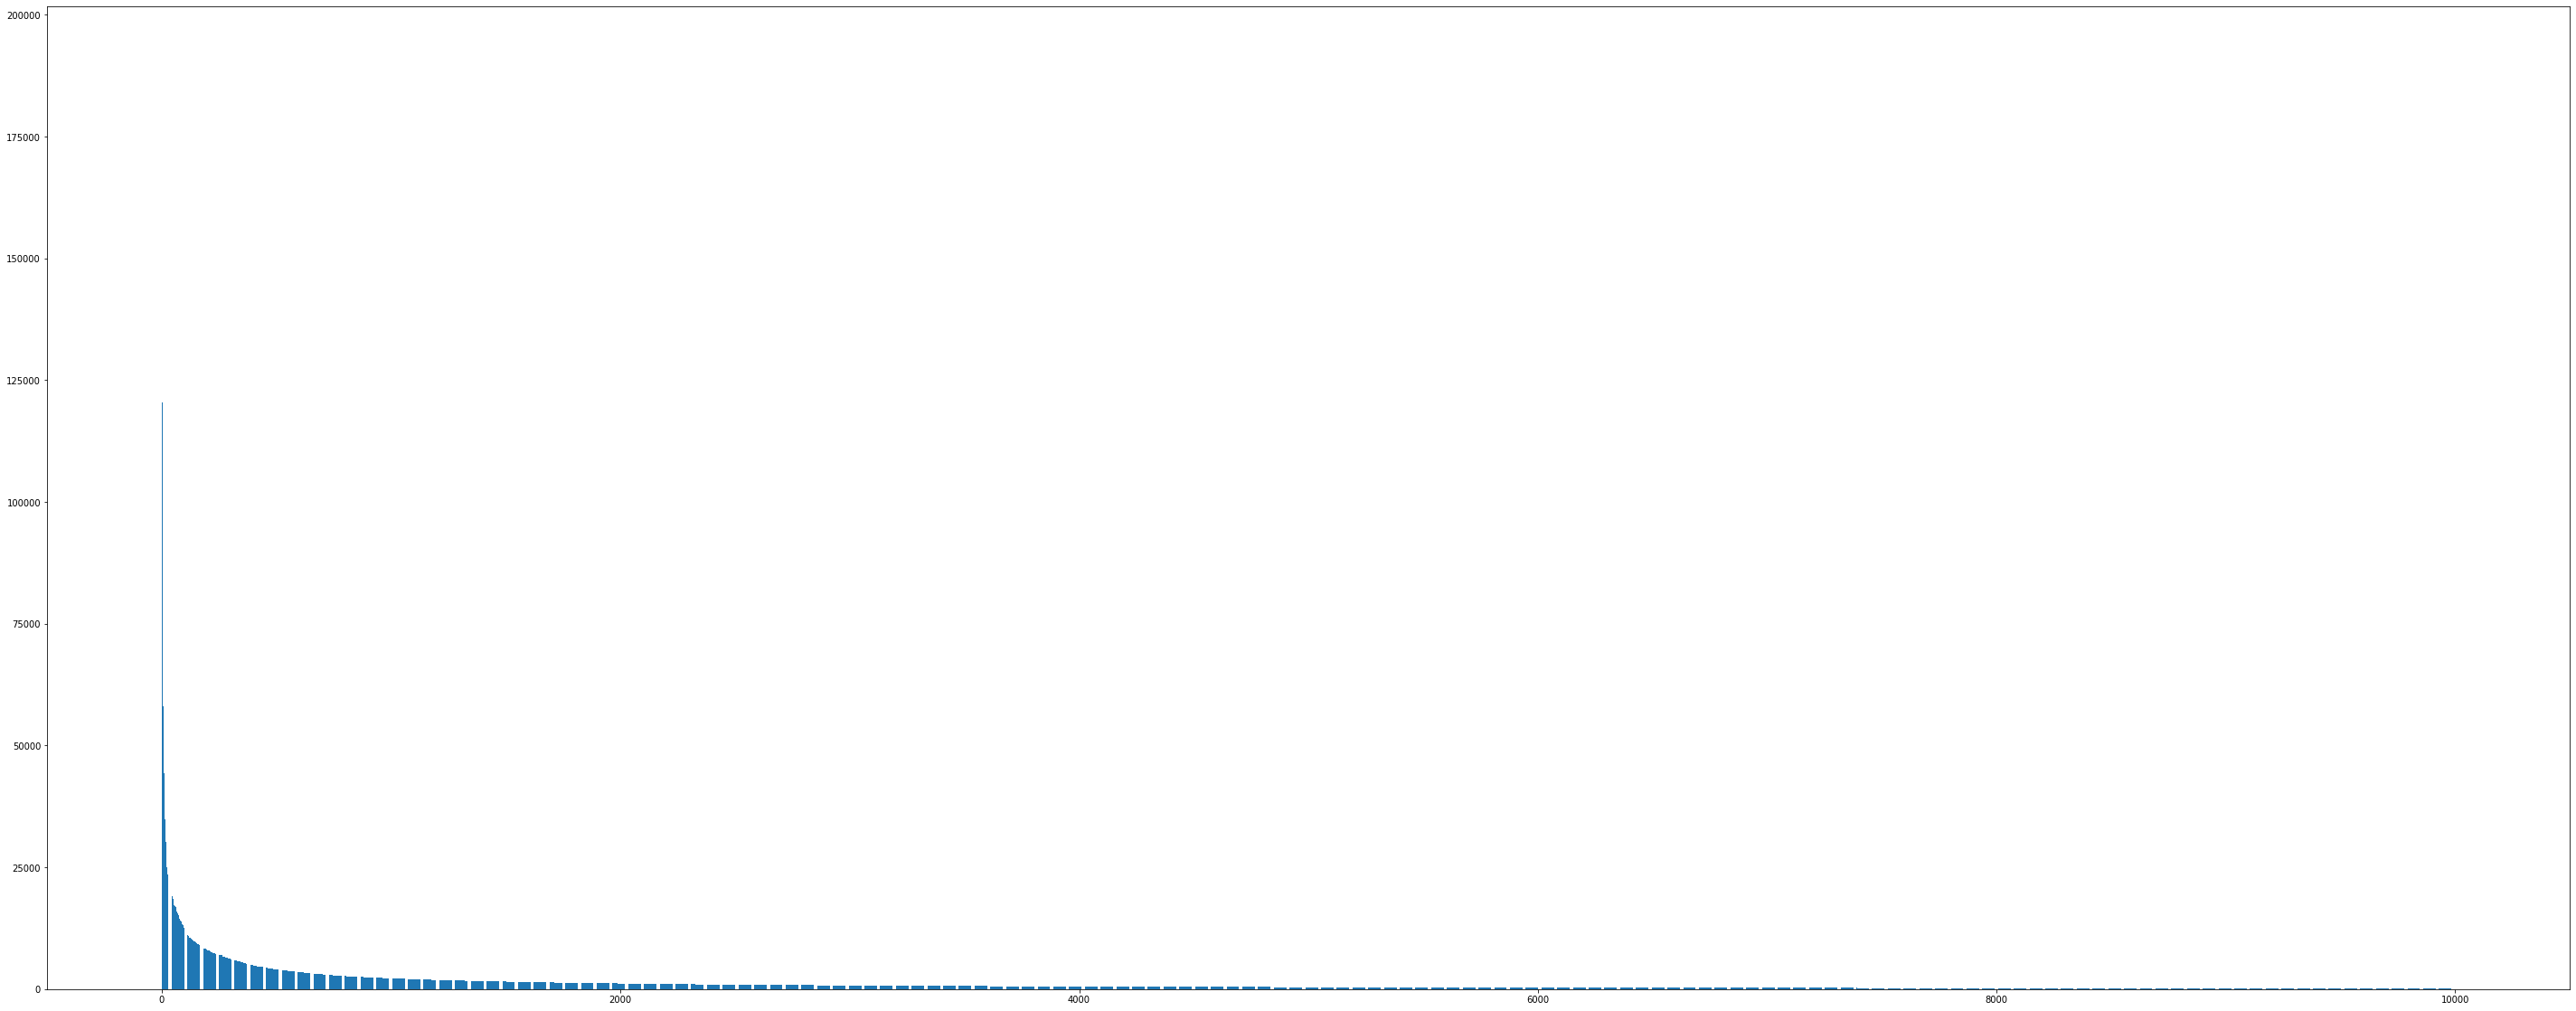

Executed in 7.67 seconds


In [60]:
start_time = time.time()
plt.rcParams["figure.figsize"] = [50, 20]
fig, ax = plt.subplots()
ax.bar(range(0, 5000), count_df['photo_count'][0:5000])
plt.show()
print("Executed in %.2f seconds" % (time.time() - start_time))

1     144708
2     120380
3      78724
4      59295
5      58520
       ...  
95     12901
96     12551
97     12527
98     12505
99     12459
Name: photo_count, Length: 99, dtype: int64